1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

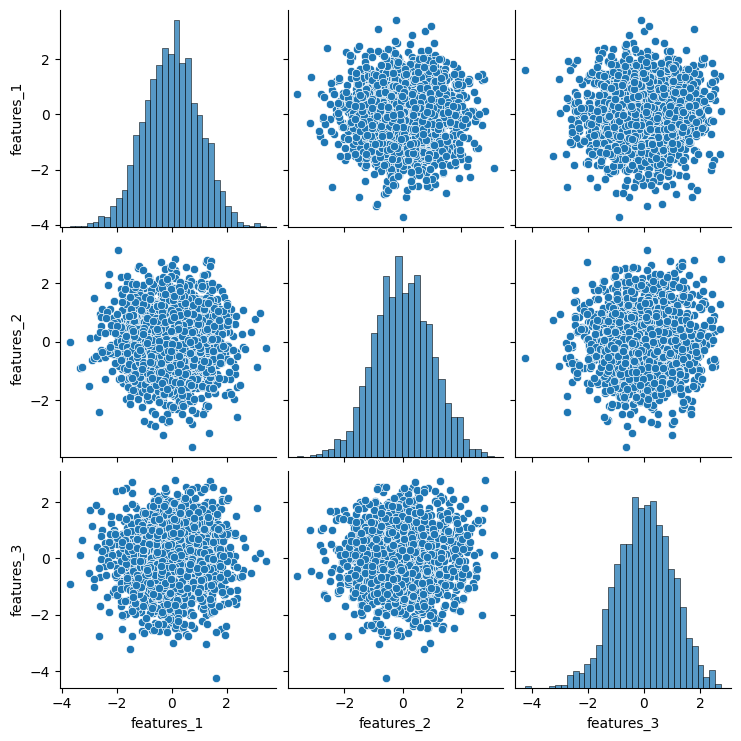

In [21]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv?dl=1")
sns.pairplot(df[['features_1','features_2', 'features_3']])

# On the main diagonal we have the pdfs of features 1 2 and 3 which as we can see are gaussian distributed.
# All the other elements represent the correlation between features which is zero in all cases
# Two correlated gaussian random variables have an ellptical shape while two uncorrelated r.v.s have a more circular shape

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

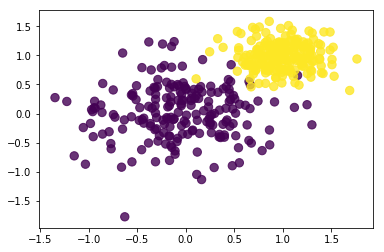

In [22]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

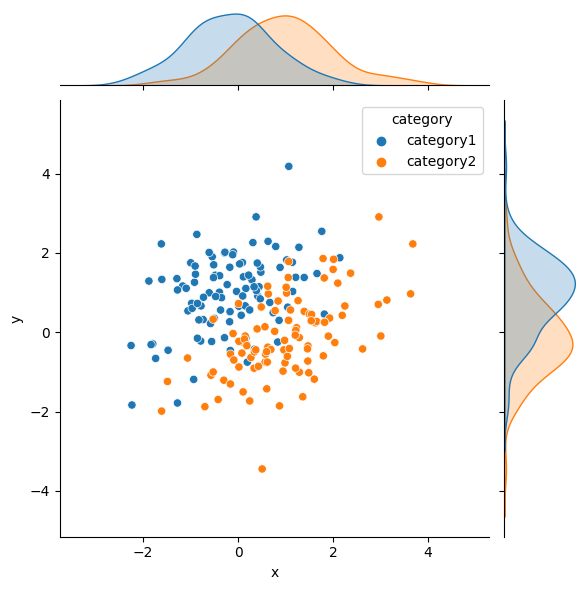

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns

n = 100
mean1, cov1 = [0, 1], [(1, .5), (.5, 1)]
mean2, cov2 = [1, 0], [(1, .5), (.5, 1)]
gaussian1 = np.random.multivariate_normal(mean1, cov1, n)
gaussian2 = np.random.multivariate_normal(mean2, cov2, n)

gaussians = np.concatenate((gaussian1, gaussian2))
categories = np.array(['category1']*n+['category2']*n).reshape((n*2,1))
dataset = np.concatenate((categories,gaussians), axis=1)

df = pd.DataFrame(dataset, columns=['category','x', 'y'])
df[['x', 'y']] = df[['x', 'y']].astype(float)

sns.jointplot(x="x", y="y", hue='category',data=df)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


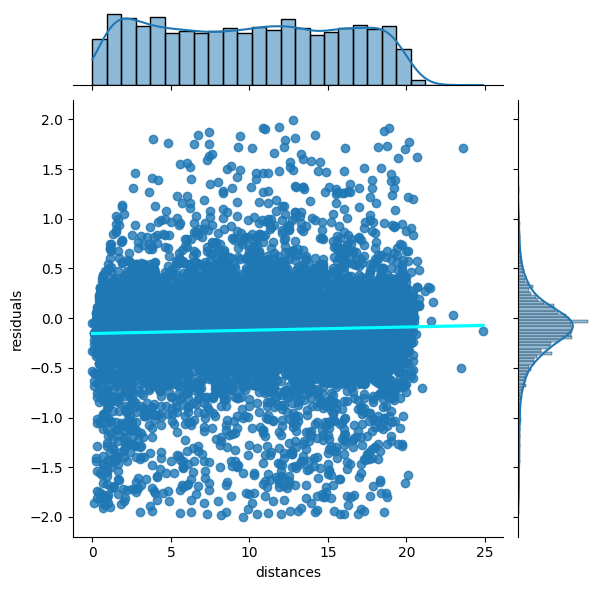

In [300]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import pickle
import pandas as pd
import seaborn as sns

infile = open('data/residuals_261.pkl', 'rb')
new_dict = pickle.load(infile)
infile.close()

df = pd.DataFrame.from_dict(new_dict.reshape(1)[0])
df = df[abs(df['residuals']) < 2]
display(df)

sns.jointplot(data=df, x='distances', y='residuals', kind="reg",joint_kws={'line_kws':{'color':'cyan'}})

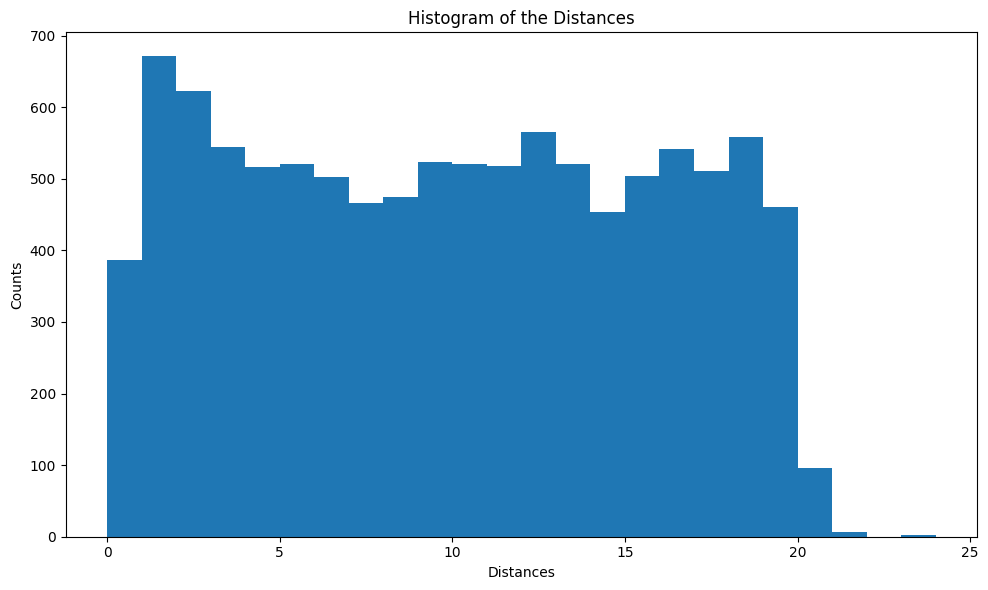

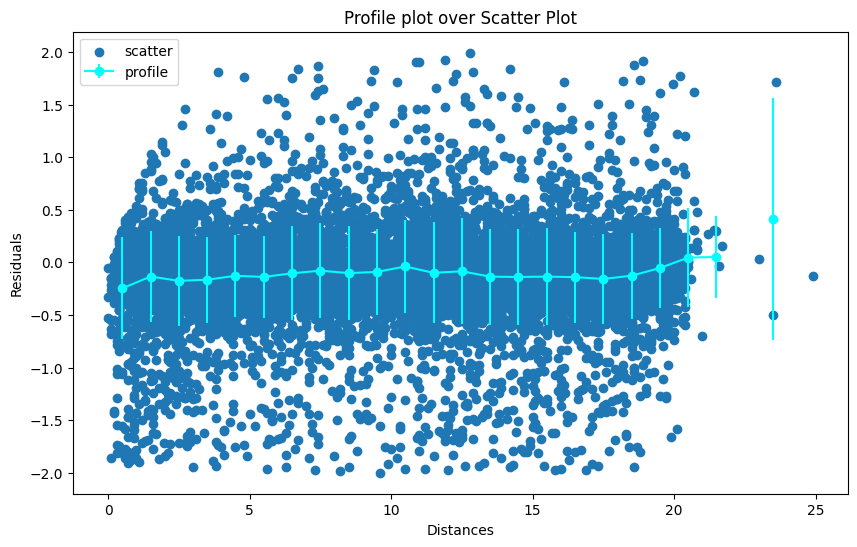

In [299]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
h, bins, _ = plt.hist(df['distances'], bins=np.arange(df['distances'].min(), df['distances'].max()))

ax = fig.axes[0]
ax.set_title('Histogram of the Distances')
ax.set_xlabel('Distances')
ax.set_ylabel('Counts')
fig.tight_layout()

x = (bins[1:]+bins[:-1])/2
mask = [ ( (df['distances'] >= bins[i]) & (df['distances'] < bins[i+1])) for i in range(bins.size-1) ]
y = [ df[mask[i]]['residuals'].mean() for i in range(len(mask)) ]
err_y = [ df[mask[i]]['residuals'].std() for i in range(len(mask)) ]

fig2 = plt.figure(figsize=(10, 6))
plt.scatter(df['distances'], df['residuals'],label='scatter')
plt.errorbar(x, y, yerr=err_y, fmt='o-', color='cyan', label='profile')

plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Profile plot over Scatter Plot')

plt.legend()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.
